<a href="https://colab.research.google.com/github/anish9701/FlightPricePrediction/blob/main/expedia_flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [10]:
train_data.shape

train_data.describe(include='all')

train_data.info()


test_data.shape

test_data.describe(include='all')

test_data.info()
#train_data has a null value in Total_Stops

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

In [12]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

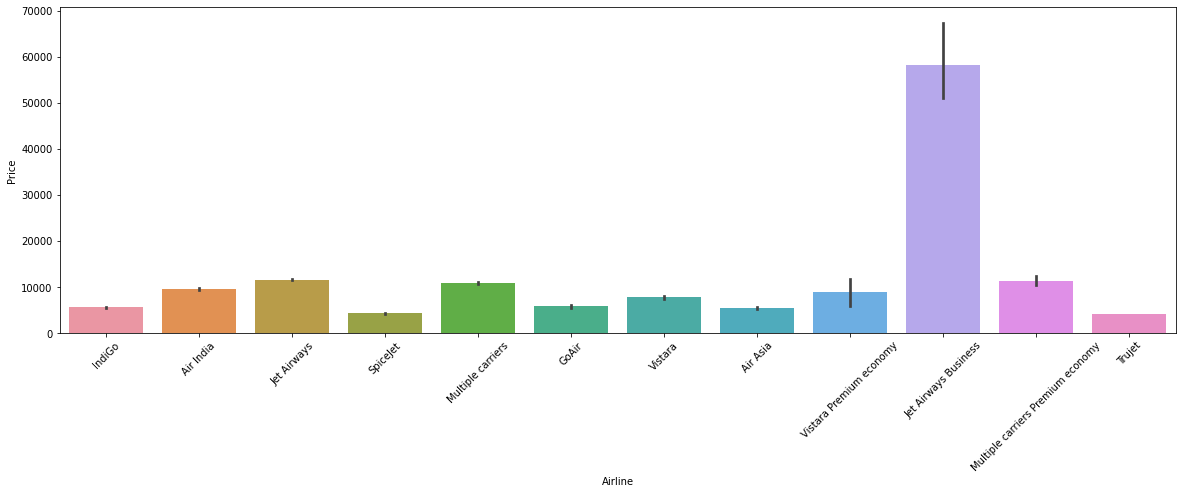

In [13]:
plt.figure(figsize=(20, 6))
sns.barplot(data=train_data, x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

## Feature Selection
Checking if all the airlines present in training data are also present in the test data, if there is a mismatch we won't be able to do label encoding, so we would be removing the mismatched data

For Airlines

In [14]:
set(train_data['Airline'])==set(test_data['Airline'])

False

In [15]:
train_data=train_data[train_data['Airline']!='Trujet']

In [16]:
set(train_data['Airline'])==set(test_data['Airline'])

True

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train_data['Airline']=labelencoder.fit_transform(train_data['Airline'])
test_data['Airline']=labelencoder.fit_transform(test_data['Airline'])

Source

In [20]:
set(train_data['Source'])==set(test_data['Source']) # No mismatch, so no need to drop
train_data['Source']=labelencoder.fit_transform(train_data['Source'])
test_data['Source']=labelencoder.fit_transform(test_data['Source'])

Destination

In [22]:
set(train_data['Destination'])==set(test_data['Destination']) #No mismatch, so no need to drop
train_data['Destination']=labelencoder.fit_transform(train_data['Destination'])
test_data['Destination']=labelencoder.fit_transform(test_data['Destination'])

###Total Stops
Dropping the missing stop

In [26]:
train_data= train_data[train_data['Total_Stops'].notnull()]

In [27]:
train_data['Total_Stops']=train_data['Total_Stops'].str[0]
test_data['Total_Stops']=test_data['Total_Stops'].str[0]


In [42]:
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')
test_data['Total_Stops']=test_data['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')

In [43]:
#Additional_info

In [44]:
set(train_data['Additional_Info'])==set(test_data['Additional_Info'])
train_data['Additional_Info']=train_data['Additional_Info'].replace('No Info', 'No Info')
train_data['Additional_Info']=train_data['Additional_Info'].replace(['2 Long layover','1 Short layover','Red-eye flight'],'Rare')

In [45]:
train_data=train_data[train_data['Additional_Info']!= 'Rare']

In [46]:
set(train_data['Additional_Info'])==set(test_data['Additional_Info'])

False

In [47]:
train_data['Additional_Info'] = labelencoder.fit_transform(train_data['Additional_Info'])
test_data['Additional_Info'] = labelencoder.transform(test_data['Additional_Info'])

In [48]:
train_data['Duration'] = train_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
test_data['Duration'] = test_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)


In [49]:
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'])
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])

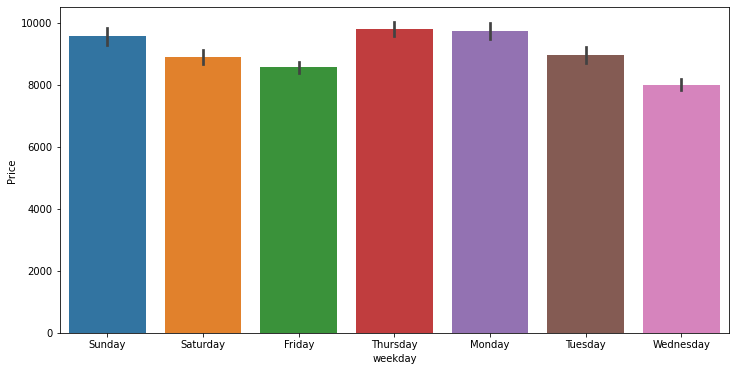

In [50]:
train_data['weekday'] = train_data['Date_of_Journey'].dt.day_name()
test_data['weekday'] = test_data['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='weekday', y='Price')
plt.show()

train_data['weekday'] = labelencoder.fit_transform(train_data['weekday'])
test_data['weekday'] = labelencoder.transform(test_data['weekday'])

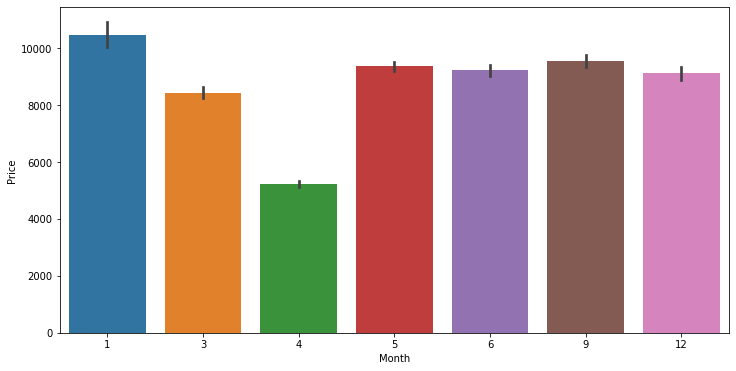

In [51]:
train_data['Month'] = train_data['Date_of_Journey'].dt.month
test_data['Month'] = test_data['Date_of_Journey'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='Month', y='Price')
plt.show()

In [52]:
train_data = train_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month', 'Price']]

test_data = test_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month']] 

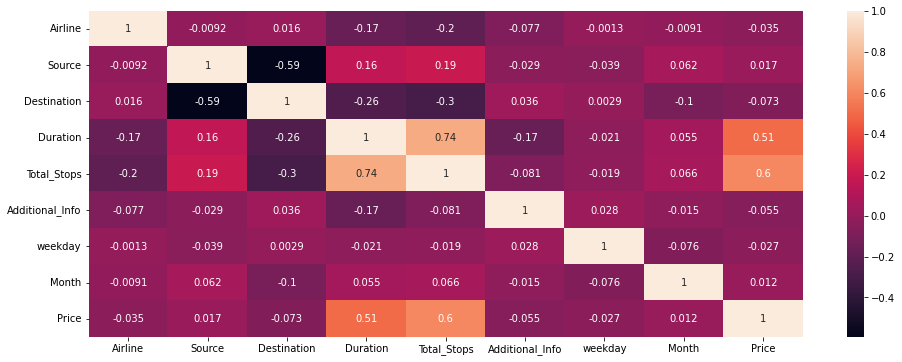

In [53]:
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [54]:
array = train_data.values
X = array[:, 0:8]
Y = array[:, 8]

In [55]:
from sklearn.preprocessing import Normalizer

nz = Normalizer()
rescaled_X = nz.fit_transform(X)
test_rescaled_X = nz.transform(test_data)
rescaled_X

array([[0.01762025, 0.        , 0.02936709, ..., 0.03524051, 0.01762025,
        0.01762025],
       [0.00224688, 0.00674064, 0.        , ..., 0.01348127, 0.00449376,
        0.00224688],
       [0.00350858, 0.00175429, 0.00087715, ..., 0.00526287, 0.        ,
        0.00789431],
       ...,
       [0.0221962 , 0.        , 0.0110981 , ..., 0.03329431, 0.0110981 ,
        0.0221962 ],
       [0.05607613, 0.        , 0.0311534 , ..., 0.03738408, 0.02492272,
        0.00623068],
       [0.00199943, 0.00399886, 0.00199943, ..., 0.01199657, 0.00799771,
        0.01799485]])

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(rescaled_X, Y, test_size=0.20, random_state=1)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = []

models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('RFR', RandomForestRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('DTR', DecisionTreeRegressor()))

names = []
results = []

for name, model in models:
  model = model.fit(x_train, y_train)
  accuracy = model.score(x_valid, y_valid)
  results.append(accuracy)
  names.append(name)
  print('%s:%f'%(name, accuracy))

LR:0.403296
LA:0.391143
RFR:0.745051
EN:0.001181
KNN:0.709881
SVM:-0.019459
DTR:0.596661


In [61]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


array = [10, 50, 100, 200, 500]

for num_trees in array:
  max_features = 5
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
  results = cross_val_score(model_1, X, Y, cv=kfold)
  print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.782551)
num_trees : 50.000000 (0.798623)
num_trees : 100.000000 (0.799655)
num_trees : 200.000000 (0.800233)
num_trees : 500.000000 (0.800788)


In [62]:

max_features = 5
model_2 = RandomForestRegressor(n_estimators=200, max_features=max_features)
model_2.fit(X, Y)
predictions = model_2.predict(test_data)
predictions

array([15117.393125  ,  4459.31      , 12895.375     , ...,
       15218.86625   ,  9550.92416667,  8519.119     ])